# Lab - Week2

## Questions:

1. When do the first and last flights leave each day?

1. When there is a missing value in dep_time then this is an indication of canceled flight. Find the number of cancelled flights for each (carrier, origin) combination.

1. Which carrier has the worst dep_delays?

1. Which plane (tailnum) has the worst on-time record?

1. For each plane, count the number of flights before the first delay of greater than 1 hour.

1. By using the flights data find all flights:

1. Had an arrival delay of two or more hours.

1. Flew to Houston (IAH or HOU)

1. Were operated by American, Delta

1. How many values are missing in dep_time?

1. Sort flight to find fastest flight.

1. Which flights travelled the shortest?

1. Merge `flights` dataframe with `weather` dataframe and investigate if weather has any affect on delays

In [1]:
import pandas as pd
import seaborn as sns

flights = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/nyc_flights.csv')

weather = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/relational_data/nyc_weather.csv')

# example merge:
# flights.merge(weather, on= ['year', 'month', 'day', 'hour', 'origin'])

In [2]:
flights.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [3]:
print('First flight for each day: ')
print(flights.groupby(['year', 'month', 'day']).dep_time.min())
print('Last flight for each day: ')
print(flights.groupby(['year', 'month', 'day']).dep_time.max())

First flight for each day: 
year  month  day
2013  1      1      517.0
             2       42.0
             3       32.0
             4       25.0
             5       14.0
                    ...  
      12     27       2.0
             28       7.0
             29       3.0
             30       1.0
             31      13.0
Name: dep_time, Length: 365, dtype: float64
Last flight for each day: 
year  month  day
2013  1      1      2356.0
             2      2354.0
             3      2349.0
             4      2358.0
             5      2357.0
                     ...  
      12     27     2351.0
             28     2358.0
             29     2400.0
             30     2356.0
             31     2356.0
Name: dep_time, Length: 365, dtype: float64


The number of cancelled flights

In [4]:
non_cancelled = flights.dep_time.dropna(how='any')
number_cancelled = len(flights.dep_time) - len(non_cancelled)
print(f'Number cancelled: {number_cancelled}')

Number cancelled: 8255


Carrier with worst dep_delays

In [5]:
year_del_carrier = flights.groupby(['carrier']).dep_delay.sum()
year_del_carrier.sort_values(ascending=False, inplace=True)
print(f'Worst carrier for delays: {year_del_carrier.index[0]}')

Worst carrier for delays: EV


Which plane has the worst on time record

In [6]:
on_time_record = flights.groupby(['tailnum']).arr_delay.sum()
on_time_record.sort_values(ascending=False, inplace=True)
print(f'Plane that has worst on time record: {on_time_record.index[0]}')

Plane that has worst on time record: N15910


For each plane, count the number of flights before the first delay of greater than 1 hour.

In [7]:
flights_delays = flights.loc[:, ['dep_delay', 'tailnum']]
flights_delays.head(5)

,dep_delay,tailnum
0,2.0,N14228
1,4.0,N24211
2,2.0,N619AA
3,-1.0,N804JB
4,-6.0,N668DN


In [13]:
# Reference: https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/

for tailnum in set(flights_delays['tailnum']):
    counter = 0
    flights_delays_tailnum = flights_delays[flights_delays['tailnum'] == tailnum]
    for delay in flights_delays_tailnum['dep_delay']:
        if delay > 60:
            print(f'Number of flights before first >60 min delay for {tailnum}: {counter} flights')
            break
        else:
            counter+= 1

Number of flights before first >60 min delay for N16961: 11 flights
Number of flights before first >60 min delay for N7734H: 11 flights
Number of flights before first >60 min delay for N717TW: 79 flights
Number of flights before first >60 min delay for N926WN: 23 flights
Number of flights before first >60 min delay for N8907A: 7 flights
Number of flights before first >60 min delay for N793SA: 5 flights
Number of flights before first >60 min delay for N704X: 9 flights
Number of flights before first >60 min delay for N371NW: 7 flights
Number of flights before first >60 min delay for N24729: 14 flights
Number of flights before first >60 min delay for N906DL: 48 flights
Number of flights before first >60 min delay for N802UA: 10 flights
Number of flights before first >60 min delay for N5CNAA: 6 flights
Number of flights before first >60 min delay for N3JJAA: 35 flights
Number of flights before first >60 min delay for N45440: 65 flights
Number of flights before first >60 min delay for N524S

Number of flights before first >60 min delay for N931WN: 3 flights
Number of flights before first >60 min delay for N6704Z: 4 flights
Number of flights before first >60 min delay for N12924: 9 flights
Number of flights before first >60 min delay for N132EV: 6 flights
Number of flights before first >60 min delay for N8775A: 1 flights
Number of flights before first >60 min delay for N243WN: 5 flights
Number of flights before first >60 min delay for N604MQ: 23 flights
Number of flights before first >60 min delay for N578UA: 3 flights
Number of flights before first >60 min delay for N420UA: 22 flights
Number of flights before first >60 min delay for N12922: 20 flights
Number of flights before first >60 min delay for N3FHAA: 28 flights
Number of flights before first >60 min delay for N434WN: 14 flights
Number of flights before first >60 min delay for N604QX: 19 flights
Number of flights before first >60 min delay for N469AA: 24 flights
Number of flights before first >60 min delay for N965UW

Number of flights before first >60 min delay for N372NW: 26 flights
Number of flights before first >60 min delay for N630VA: 22 flights
Number of flights before first >60 min delay for N3KMAA: 1 flights
Number of flights before first >60 min delay for N3GFAA: 54 flights
Number of flights before first >60 min delay for N937WN: 19 flights
Number of flights before first >60 min delay for N202WN: 1 flights
Number of flights before first >60 min delay for N837VA: 8 flights
Number of flights before first >60 min delay for N360NB: 61 flights
Number of flights before first >60 min delay for N841VA: 44 flights
Number of flights before first >60 min delay for N12135: 30 flights
Number of flights before first >60 min delay for N672UA: 6 flights
Number of flights before first >60 min delay for N194UW: 5 flights
Number of flights before first >60 min delay for N389HA: 9 flights
Number of flights before first >60 min delay for N752SW: 3 flights
Number of flights before first >60 min delay for N574AA

Number of flights before first >60 min delay for N992DL: 32 flights
Number of flights before first >60 min delay for N473WN: 3 flights
Number of flights before first >60 min delay for N730SW: 2 flights
Number of flights before first >60 min delay for N412UA: 27 flights
Number of flights before first >60 min delay for N505UA: 10 flights
Number of flights before first >60 min delay for N543AA: 10 flights
Number of flights before first >60 min delay for N492AA: 14 flights
Number of flights before first >60 min delay for N662JB: 5 flights
Number of flights before first >60 min delay for N587AA: 1 flights
Number of flights before first >60 min delay for N552UA: 1 flights
Number of flights before first >60 min delay for N524VA: 4 flights
Number of flights before first >60 min delay for N701GS: 22 flights
Number of flights before first >60 min delay for N12122: 5 flights
Number of flights before first >60 min delay for N823MQ: 4 flights
Number of flights before first >60 min delay for N11109:

Number of flights before first >60 min delay for N978DL: 46 flights
Number of flights before first >60 min delay for N563JB: 15 flights
Number of flights before first >60 min delay for N14180: 2 flights
Number of flights before first >60 min delay for N925MQ: 1 flights
Number of flights before first >60 min delay for N565AA: 19 flights
Number of flights before first >60 min delay for N3HYAA: 24 flights
Number of flights before first >60 min delay for N73299: 9 flights
Number of flights before first >60 min delay for N13949: 23 flights
Number of flights before first >60 min delay for N436UA: 13 flights
Number of flights before first >60 min delay for N717EV: 8 flights
Number of flights before first >60 min delay for N377DA: 34 flights
Number of flights before first >60 min delay for N3KSAA: 25 flights
Number of flights before first >60 min delay for N569UA: 13 flights
Number of flights before first >60 min delay for N14920: 15 flights
Number of flights before first >60 min delay for N28

Number of flights before first >60 min delay for N258WN: 16 flights
Number of flights before first >60 min delay for N14179: 5 flights
Number of flights before first >60 min delay for N76517: 25 flights
Number of flights before first >60 min delay for N919DL: 19 flights
Number of flights before first >60 min delay for N167US: 2 flights
Number of flights before first >60 min delay for N402UA: 1 flights
Number of flights before first >60 min delay for N961DL: 20 flights
Number of flights before first >60 min delay for N746SW: 10 flights
Number of flights before first >60 min delay for N5DTAA: 1 flights
Number of flights before first >60 min delay for N4WMAA: 8 flights
Number of flights before first >60 min delay for N818UA: 44 flights
Number of flights before first >60 min delay for N703TW: 66 flights
Number of flights before first >60 min delay for N201LV: 4 flights
Number of flights before first >60 min delay for N37281: 2 flights
Number of flights before first >60 min delay for N76065

Number of flights before first >60 min delay for N337NW: 8 flights
Number of flights before first >60 min delay for N5FPAA: 76 flights
Number of flights before first >60 min delay for N806JB: 11 flights
Number of flights before first >60 min delay for N3CPAA: 3 flights
Number of flights before first >60 min delay for N179UW: 45 flights
Number of flights before first >60 min delay for N9EAMQ: 26 flights
Number of flights before first >60 min delay for N3EAAA: 20 flights
Number of flights before first >60 min delay for N13970: 3 flights
Number of flights before first >60 min delay for N597AA: 27 flights
Number of flights before first >60 min delay for N403WN: 8 flights
Number of flights before first >60 min delay for N14562: 11 flights
Number of flights before first >60 min delay for N642DL: 48 flights
Number of flights before first >60 min delay for N450WN: 15 flights
Number of flights before first >60 min delay for N628AW: 0 flights
Number of flights before first >60 min delay for N538

Number of flights before first >60 min delay for N967AT: 14 flights
Number of flights before first >60 min delay for N299AT: 3 flights
Number of flights before first >60 min delay for N742PS: 22 flights
Number of flights before first >60 min delay for N486AA: 22 flights
Number of flights before first >60 min delay for N746UW: 63 flights
Number of flights before first >60 min delay for N935AT: 41 flights
Number of flights before first >60 min delay for N350NA: 6 flights
Number of flights before first >60 min delay for N611MQ: 12 flights
Number of flights before first >60 min delay for N826AS: 0 flights
Number of flights before first >60 min delay for N527JB: 3 flights
Number of flights before first >60 min delay for N77525: 10 flights
Number of flights before first >60 min delay for N499WN: 9 flights
Number of flights before first >60 min delay for N18223: 0 flights
Number of flights before first >60 min delay for N5ERAA: 0 flights
Number of flights before first >60 min delay for N539AA

Number of flights before first >60 min delay for N583JB: 13 flights
Number of flights before first >60 min delay for N582CA: 3 flights
Number of flights before first >60 min delay for N852UA: 28 flights
Number of flights before first >60 min delay for N905DE: 8 flights
Number of flights before first >60 min delay for N990AT: 8 flights
Number of flights before first >60 min delay for N454WN: 16 flights
Number of flights before first >60 min delay for N3BPAA: 2 flights
Number of flights before first >60 min delay for N655MQ: 13 flights
Number of flights before first >60 min delay for N5DWAA: 16 flights
Number of flights before first >60 min delay for N914WN: 6 flights
Number of flights before first >60 min delay for N398DA: 61 flights
Number of flights before first >60 min delay for N936WN: 15 flights
Number of flights before first >60 min delay for N830UA: 11 flights
Number of flights before first >60 min delay for N416WN: 3 flights
Number of flights before first >60 min delay for N563U

Number of flights before first >60 min delay for N13914: 2 flights
Number of flights before first >60 min delay for N352NW: 29 flights
Number of flights before first >60 min delay for N237WN: 16 flights
Number of flights before first >60 min delay for N562UW: 45 flights
Number of flights before first >60 min delay for N3JPAA: 2 flights
Number of flights before first >60 min delay for N3CJAA: 22 flights
Number of flights before first >60 min delay for N421UA: 7 flights
Number of flights before first >60 min delay for N694MQ: 18 flights
Number of flights before first >60 min delay for N551AA: 13 flights
Number of flights before first >60 min delay for N967WN: 3 flights
Number of flights before first >60 min delay for N14923: 4 flights
Number of flights before first >60 min delay for N479UA: 8 flights
Number of flights before first >60 min delay for N358SW: 1 flights
Number of flights before first >60 min delay for N14972: 1 flights
Number of flights before first >60 min delay for N807MQ:

Number of flights before first >60 min delay for N814MQ: 13 flights
Number of flights before first >60 min delay for N917DL: 13 flights
Number of flights before first >60 min delay for N911DE: 10 flights
Number of flights before first >60 min delay for N917XJ: 1 flights
Number of flights before first >60 min delay for N528MQ: 12 flights
Number of flights before first >60 min delay for N456UA: 3 flights
Number of flights before first >60 min delay for N534MQ: 1 flights
Number of flights before first >60 min delay for N3FDAA: 16 flights
Number of flights before first >60 min delay for N57852: 8 flights
Number of flights before first >60 min delay for N68452: 22 flights
Number of flights before first >60 min delay for N170US: 22 flights
Number of flights before first >60 min delay for N3FPAA: 32 flights
Number of flights before first >60 min delay for N234WN: 16 flights
Number of flights before first >60 min delay for N346NB: 128 flights
Number of flights before first >60 min delay for N6

Number of flights before first >60 min delay for N708UW: 43 flights
Number of flights before first >60 min delay for N432WN: 24 flights
Number of flights before first >60 min delay for N963AT: 5 flights
Number of flights before first >60 min delay for N989DL: 31 flights
Number of flights before first >60 min delay for N435AA: 8 flights
Number of flights before first >60 min delay for N12957: 12 flights
Number of flights before first >60 min delay for N18112: 28 flights
Number of flights before first >60 min delay for N14977: 4 flights
Number of flights before first >60 min delay for N571AA: 4 flights
Number of flights before first >60 min delay for N5ELAA: 1 flights
Number of flights before first >60 min delay for N161UW: 44 flights
Number of flights before first >60 min delay for N324JB: 43 flights
Number of flights before first >60 min delay for N816MQ: 58 flights
Number of flights before first >60 min delay for N24212: 12 flights
Number of flights before first >60 min delay for N405

Number of flights before first >60 min delay for N559AA: 1 flights
Number of flights before first >60 min delay for N999DN: 19 flights
Number of flights before first >60 min delay for N978AT: 24 flights
Number of flights before first >60 min delay for N17115: 4 flights
Number of flights before first >60 min delay for N3BSAA: 22 flights
Number of flights before first >60 min delay for N748EV: 0 flights
Number of flights before first >60 min delay for N79521: 61 flights
Number of flights before first >60 min delay for N351AA: 1 flights
Number of flights before first >60 min delay for N345NB: 45 flights
Number of flights before first >60 min delay for N554AA: 14 flights
Number of flights before first >60 min delay for N915WN: 4 flights
Number of flights before first >60 min delay for N34460: 49 flights
Number of flights before first >60 min delay for N14173: 39 flights
Number of flights before first >60 min delay for N730MQ: 14 flights
Number of flights before first >60 min delay for N193

Number of flights before first >60 min delay for N365NW: 7 flights
Number of flights before first >60 min delay for N945WN: 19 flights
Number of flights before first >60 min delay for N244WN: 21 flights
Number of flights before first >60 min delay for N903FJ: 6 flights
Number of flights before first >60 min delay for N318JB: 22 flights
Number of flights before first >60 min delay for N301NB: 19 flights
Number of flights before first >60 min delay for N172DZ: 10 flights
Number of flights before first >60 min delay for N514MQ: 14 flights
Number of flights before first >60 min delay for N659MQ: 5 flights
Number of flights before first >60 min delay for N583AA: 0 flights
Number of flights before first >60 min delay for N507MJ: 17 flights
Number of flights before first >60 min delay for N939LR: 2 flights
Number of flights before first >60 min delay for N963DN: 3 flights
Number of flights before first >60 min delay for N11189: 41 flights
Number of flights before first >60 min delay for N472A

Number of flights before first >60 min delay for N507JB: 15 flights
Number of flights before first >60 min delay for N635JB: 53 flights
Number of flights before first >60 min delay for N408WN: 3 flights
Number of flights before first >60 min delay for N15572: 10 flights
Number of flights before first >60 min delay for N503UA: 5 flights
Number of flights before first >60 min delay for N487UA: 8 flights
Number of flights before first >60 min delay for N949UW: 4 flights
Number of flights before first >60 min delay for N402AS: 5 flights
Number of flights before first >60 min delay for N15574: 4 flights
Number of flights before first >60 min delay for N8745B: 11 flights
Number of flights before first >60 min delay for N671DN: 9 flights
Number of flights before first >60 min delay for N424AA: 21 flights
Number of flights before first >60 min delay for N816UA: 4 flights
Number of flights before first >60 min delay for N779NC: 8 flights
Number of flights before first >60 min delay for N504MJ: 

Number of flights before first >60 min delay for N17108: 33 flights
Number of flights before first >60 min delay for N3CHAA: 50 flights
Number of flights before first >60 min delay for N532UA: 60 flights
Number of flights before first >60 min delay for N38458: 2 flights
Number of flights before first >60 min delay for N331NB: 0 flights
Number of flights before first >60 min delay for N720WN: 23 flights
Number of flights before first >60 min delay for N663AW: 52 flights
Number of flights before first >60 min delay for N12552: 14 flights
Number of flights before first >60 min delay for N37466: 1 flights
Number of flights before first >60 min delay for N384DA: 6 flights
Number of flights before first >60 min delay for N717MQ: 75 flights
Number of flights before first >60 min delay for N792SW: 5 flights
Number of flights before first >60 min delay for N37434: 13 flights
Number of flights before first >60 min delay for N134EV: 6 flights
Number of flights before first >60 min delay for N8709

Number of flights before first >60 min delay for N608JB: 23 flights
Number of flights before first >60 min delay for N981DL: 16 flights
Number of flights before first >60 min delay for N545UA: 7 flights
Number of flights before first >60 min delay for N403AS: 8 flights
Number of flights before first >60 min delay for N721UW: 24 flights
Number of flights before first >60 min delay for N37255: 42 flights
Number of flights before first >60 min delay for N653AW: 11 flights
Number of flights before first >60 min delay for N551UW: 23 flights
Number of flights before first >60 min delay for N27213: 44 flights
Number of flights before first >60 min delay for N908DE: 0 flights
Number of flights before first >60 min delay for N14120: 3 flights
Number of flights before first >60 min delay for N3EVAA: 33 flights
Number of flights before first >60 min delay for N535MQ: 74 flights
Number of flights before first >60 min delay for N77295: 37 flights
Number of flights before first >60 min delay for N31

Number of flights before first >60 min delay for N777NC: 5 flights
Number of flights before first >60 min delay for N845UA: 25 flights
Number of flights before first >60 min delay for N328NW: 16 flights
Number of flights before first >60 min delay for N5DCAA: 2 flights
Number of flights before first >60 min delay for N8495B: 9 flights
Number of flights before first >60 min delay for N8942A: 27 flights
Number of flights before first >60 min delay for N291WN: 23 flights
Number of flights before first >60 min delay for N641MQ: 30 flights
Number of flights before first >60 min delay for N339NB: 23 flights
Number of flights before first >60 min delay for N586AS: 0 flights
Number of flights before first >60 min delay for N39461: 3 flights
Number of flights before first >60 min delay for N434UA: 21 flights
Number of flights before first >60 min delay for N520JB: 21 flights
Number of flights before first >60 min delay for N481WN: 9 flights
Number of flights before first >60 min delay for N3742

Number of flights before first >60 min delay for N174US: 55 flights
Number of flights before first >60 min delay for N8970D: 9 flights
Number of flights before first >60 min delay for N3JRAA: 17 flights
Number of flights before first >60 min delay for N546MQ: 20 flights
Number of flights before first >60 min delay for N371AA: 13 flights
Number of flights before first >60 min delay for N643MQ: 10 flights
Number of flights before first >60 min delay for N404WN: 16 flights
Number of flights before first >60 min delay for N633AA: 1 flights
Number of flights before first >60 min delay for N686MQ: 7 flights
Number of flights before first >60 min delay for N8968E: 1 flights
Number of flights before first >60 min delay for N200PQ: 11 flights
Number of flights before first >60 min delay for N173DZ: 3 flights
Number of flights before first >60 min delay for N8620H: 0 flights
Number of flights before first >60 min delay for N8721B: 7 flights
Number of flights before first >60 min delay for N846UA

Number of flights before first >60 min delay for N965DL: 22 flights
Number of flights before first >60 min delay for N3JXAA: 41 flights
Number of flights before first >60 min delay for N3HFAA: 14 flights
Number of flights before first >60 min delay for N839UA: 2 flights
Number of flights before first >60 min delay for N323AS: 1 flights
Number of flights before first >60 min delay for N3BYAA: 4 flights
Number of flights before first >60 min delay for N766SW: 9 flights
Number of flights before first >60 min delay for N723UW: 10 flights
Number of flights before first >60 min delay for N474AA: 6 flights
Number of flights before first >60 min delay for N314NB: 59 flights
Number of flights before first >60 min delay for N477WN: 7 flights
Number of flights before first >60 min delay for N668UA: 6 flights
Number of flights before first >60 min delay for N327NW: 15 flights
Number of flights before first >60 min delay for N915XJ: 9 flights
Number of flights before first >60 min delay for N449UA:

Number of flights before first >60 min delay for N381DN: 6 flights
Number of flights before first >60 min delay for N940AT: 4 flights
Number of flights before first >60 min delay for N31412: 27 flights
Number of flights before first >60 min delay for N506MJ: 3 flights
Number of flights before first >60 min delay for N388DA: 5 flights
Number of flights before first >60 min delay for N66051: 1 flights
Number of flights before first >60 min delay for N520AA: 15 flights
Number of flights before first >60 min delay for N187JB: 3 flights
Number of flights before first >60 min delay for N584JB: 5 flights
Number of flights before first >60 min delay for N78524: 20 flights
Number of flights before first >60 min delay for N3EMAA: 35 flights
Number of flights before first >60 min delay for N937AT: 4 flights
Number of flights before first >60 min delay for N74856: 2 flights
Number of flights before first >60 min delay for N344NW: 38 flights
Number of flights before first >60 min delay for N8924B: 

Number of flights before first >60 min delay for N3736C: 36 flights
Number of flights before first >60 min delay for N5EWAA: 22 flights
Number of flights before first >60 min delay for N8948B: 4 flights
Number of flights before first >60 min delay for N537JB: 24 flights
Number of flights before first >60 min delay for N309JB: 3 flights
Number of flights before first >60 min delay for N3JWAA: 4 flights
Number of flights before first >60 min delay for N411WN: 6 flights
Number of flights before first >60 min delay for N545UW: 26 flights
Number of flights before first >60 min delay for N724EV: 4 flights
Number of flights before first >60 min delay for N805AY: 0 flights
Number of flights before first >60 min delay for N3GUAA: 50 flights
Number of flights before first >60 min delay for N501MJ: 6 flights
Number of flights before first >60 min delay for N3CYAA: 8 flights
Number of flights before first >60 min delay for N5EYAA: 22 flights
Number of flights before first >60 min delay for N3EYAA:

Number of flights before first >60 min delay for N230WN: 2 flights
Number of flights before first >60 min delay for N833AS: 10 flights
Number of flights before first >60 min delay for N977AT: 22 flights
Number of flights before first >60 min delay for N36247: 27 flights
Number of flights before first >60 min delay for N662MQ: 4 flights
Number of flights before first >60 min delay for N178DZ: 7 flights
Number of flights before first >60 min delay for N832UA: 1 flights
Number of flights before first >60 min delay for N206JB: 6 flights
Number of flights before first >60 min delay for N3BNAA: 2 flights
Number of flights before first >60 min delay for N965WN: 6 flights
Number of flights before first >60 min delay for N36280: 32 flights
Number of flights before first >60 min delay for N576UA: 54 flights
Number of flights before first >60 min delay for N5DRAA: 6 flights
Number of flights before first >60 min delay for N3GLAA: 35 flights
Number of flights before first >60 min delay for N33266:

Number of flights before first >60 min delay for N531MQ: 0 flights
Number of flights before first >60 min delay for N622VA: 13 flights
Number of flights before first >60 min delay for N943WN: 8 flights
Number of flights before first >60 min delay for N324US: 8 flights
Number of flights before first >60 min delay for N13908: 12 flights
Number of flights before first >60 min delay for N385DN: 18 flights
Number of flights before first >60 min delay for N521AA: 23 flights
Number of flights before first >60 min delay for N782SA: 23 flights
Number of flights before first >60 min delay for N699MQ: 8 flights
Number of flights before first >60 min delay for N37437: 34 flights
Number of flights before first >60 min delay for N698DL: 6 flights
Number of flights before first >60 min delay for N308AT: 0 flights
Number of flights before first >60 min delay for N337NB: 70 flights
Number of flights before first >60 min delay for N353AA: 7 flights
Number of flights before first >60 min delay for N33132

Number of flights before first >60 min delay for N590JB: 2 flights
Number of flights before first >60 min delay for N257WN: 10 flights
Number of flights before first >60 min delay for N4YJAA: 28 flights
Number of flights before first >60 min delay for N5CSAA: 4 flights
Number of flights before first >60 min delay for N587NW: 0 flights
Number of flights before first >60 min delay for N172DN: 5 flights
Number of flights before first >60 min delay for N16954: 31 flights
Number of flights before first >60 min delay for N789JB: 4 flights
Number of flights before first >60 min delay for N13913: 11 flights
Number of flights before first >60 min delay for N520UW: 22 flights
Number of flights before first >60 min delay for N749SW: 3 flights
Number of flights before first >60 min delay for N3CCAA: 8 flights
Number of flights before first >60 min delay for N8974C: 6 flights
Number of flights before first >60 min delay for N745SW: 11 flights
Number of flights before first >60 min delay for N557UA:

Number of flights before first >60 min delay for N78285: 37 flights
Number of flights before first >60 min delay for N932AT: 23 flights
Number of flights before first >60 min delay for N822MQ: 44 flights
Number of flights before first >60 min delay for N375JB: 3 flights
Number of flights before first >60 min delay for N333NB: 39 flights
Number of flights before first >60 min delay for N14570: 8 flights
Number of flights before first >60 min delay for N185DN: 11 flights
Number of flights before first >60 min delay for N891AT: 12 flights
Number of flights before first >60 min delay for N984DL: 1 flights
Number of flights before first >60 min delay for N18119: 66 flights
Number of flights before first >60 min delay for N195PQ: 13 flights
Number of flights before first >60 min delay for N926DL: 18 flights
Number of flights before first >60 min delay for N504MQ: 0 flights
Number of flights before first >60 min delay for N923DN: 0 flights
Number of flights before first >60 min delay for N3EX

Number of flights before first >60 min delay for N76505: 8 flights
Number of flights before first >60 min delay for N338NW: 0 flights
Number of flights before first >60 min delay for N684DA: 11 flights
Number of flights before first >60 min delay for N900EV: 2 flights
Number of flights before first >60 min delay for N599JB: 0 flights
Number of flights before first >60 min delay for N929DL: 29 flights
Number of flights before first >60 min delay for N852VA: 40 flights
Number of flights before first >60 min delay for N836VA: 13 flights
Number of flights before first >60 min delay for N216FR: 20 flights
Number of flights before first >60 min delay for N8914A: 10 flights
Number of flights before first >60 min delay for N638JB: 28 flights
Number of flights before first >60 min delay for N947UW: 45 flights
Number of flights before first >60 min delay for N57855: 13 flights
Number of flights before first >60 min delay for N6702: 0 flights
Number of flights before first >60 min delay for N1691

Find all flights with  an arrival delay of two or more hours

In [14]:
flights[flights['arr_delay'] >= 120]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
119,2013,1,1,811.0,630,101.0,1047.0,830,137.0,MQ,4576,N531MQ,LGA,CLT,118.0,544,6,30,2013-01-01T11:00:00Z
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01T23:00:00Z
218,2013,1,1,957.0,733,144.0,1056.0,853,123.0,UA,856,N534UA,EWR,BOS,37.0,200,7,33,2013-01-01T12:00:00Z
268,2013,1,1,1114.0,900,134.0,1447.0,1222,145.0,UA,1086,N76502,LGA,IAH,248.0,1416,9,0,2013-01-01T14:00:00Z
447,2013,1,1,1505.0,1310,115.0,1638.0,1431,127.0,EV,4497,N17984,EWR,RIC,63.0,277,13,10,2013-01-01T18:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336579,2013,9,30,1823.0,1545,158.0,1934.0,1733,121.0,9E,3459,N916XJ,JFK,BNA,95.0,765,15,45,2013-09-30T19:00:00Z
336668,2013,9,30,1951.0,1649,182.0,2157.0,1903,174.0,EV,4294,N13988,EWR,SAV,95.0,708,16,49,2013-09-30T20:00:00Z
336724,2013,9,30,2053.0,1815,158.0,2310.0,2054,136.0,EV,5292,N600QX,EWR,ATL,91.0,746,18,15,2013-09-30T22:00:00Z
336757,2013,9,30,2159.0,1845,194.0,2344.0,2030,194.0,9E,3320,N906XJ,JFK,BUF,50.0,301,18,45,2013-09-30T22:00:00Z


Find all flight that flew to Houston (IAH or HOU)

In [15]:
flights[(flights['dest'] == 'IAH') | (flights['dest'] == 'HOU')]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
32,2013,1,1,623.0,627,-4.0,933.0,932,1.0,UA,496,N459UA,LGA,IAH,229.0,1416,6,27,2013-01-01T11:00:00Z
81,2013,1,1,728.0,732,-4.0,1041.0,1038,3.0,UA,473,N488UA,LGA,IAH,238.0,1416,7,32,2013-01-01T12:00:00Z
89,2013,1,1,739.0,739,0.0,1104.0,1038,26.0,UA,1479,N37408,EWR,IAH,249.0,1400,7,39,2013-01-01T12:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336524,2013,9,30,1729.0,1720,9.0,2001.0,2010,-9.0,UA,652,N455UA,EWR,IAH,173.0,1400,17,20,2013-09-30T21:00:00Z
336527,2013,9,30,1735.0,1715,20.0,2010.0,2005,5.0,WN,2067,N296WN,EWR,HOU,188.0,1411,17,15,2013-09-30T21:00:00Z
336618,2013,9,30,1859.0,1859,0.0,2134.0,2159,-25.0,UA,1128,N14731,LGA,IAH,180.0,1416,18,59,2013-09-30T22:00:00Z
336694,2013,9,30,2015.0,2015,0.0,2244.0,2307,-23.0,UA,1545,N17730,EWR,IAH,174.0,1400,20,15,2013-10-01T00:00:00Z


Find all flights operated by American or Delta

In [16]:
flights[(flights['carrier'] == 'AA') | (flights['carrier'] == 'DL')]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01T11:00:00Z
14,2013,1,1,559.0,600,-1.0,941.0,910,31.0,AA,707,N3DUAA,LGA,DFW,257.0,1389,6,0,2013-01-01T11:00:00Z
20,2013,1,1,602.0,610,-8.0,812.0,820,-8.0,DL,1919,N971DL,LGA,MSP,170.0,1020,6,10,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336709,2013,9,30,2032.0,2045,-13.0,2147.0,2225,-38.0,AA,371,N434AA,LGA,ORD,105.0,733,20,45,2013-10-01T00:00:00Z
336715,2013,9,30,2041.0,2045,-4.0,2147.0,2208,-21.0,DL,985,N359NB,JFK,BOS,37.0,187,20,45,2013-10-01T00:00:00Z
336718,2013,9,30,2050.0,2045,5.0,20.0,53,-33.0,DL,347,N396DA,JFK,SJU,188.0,1598,20,45,2013-10-01T00:00:00Z
336744,2013,9,30,2121.0,2100,21.0,2349.0,14,-25.0,DL,2363,N193DN,JFK,LAX,296.0,2475,21,0,2013-10-01T01:00:00Z


How many values are missing in dep_time?

In [17]:
dep_time_missing = flights['dep_time'].isna().sum()
print(f'Number of values missing from dep_time: {dep_time_missing}')

Number of values missing from dep_time: 8255


Sort flight to find fastest flight.

In [18]:
flights[['tailnum', 'air_time']].sort_values(by='air_time', ascending=True).head(1)

,tailnum,air_time
176604,N12167,20.0


Which flights travelled the shortest?

In [19]:
flights[['tailnum', 'distance']].sort_values(by='distance', ascending=True).head(10)

,tailnum,distance
275945,NaN,17
3083,N14972,80
16328,N12540,80
112178,N13969,80
19983,N12135,80
11249,N16963,80
137872,N21144,80
116412,N12564,80
117352,N16918,80
13068,N16976,80


Merge flights dataframe with weather dataframe and investigate if weather has any affect on delays

In [20]:
weather.head(5)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


In [21]:
print('Flights shape: ', flights.shape)
print('Weather shape: ', weather.shape)

Flights shape:  (336776, 19)
Weather shape:  (26115, 15)


In [22]:
set(weather.origin)

{'EWR', 'JFK', 'LGA'}

In [23]:
set(flights.origin)

{'EWR', 'JFK', 'LGA'}

In [24]:
flights_EWR = flights[flights['origin'] == 'EWR'][['origin', 'dep_delay', 'time_hour']]
flights_JFK = flights[flights['origin'] == 'JFK'][['origin', 'dep_delay', 'time_hour']]
flights_LGA = flights[flights['origin'] == 'LGA'][['origin', 'dep_delay', 'time_hour']]
weather_EWR = weather[weather['origin'] == 'EWR']
weather_JFK = weather[weather['origin'] == 'JFK']
weather_LGA = weather[weather['origin'] == 'LGA']

In [25]:
EWR = pd.merge(flights_EWR, weather_EWR, on='time_hour', how='left')
JFK = pd.merge(flights_JFK, weather_JFK, on='time_hour', how='left')
LGA = pd.merge(flights_LGA, weather_LGA, on='time_hour', how='left')

In [26]:
flights_weather = pd.concat([EWR, JFK, LGA], axis=0, ignore_index=True)
flights_weather.drop('origin_x', axis=1, inplace=True)
flights_weather.rename(columns={'origin_y': 'origin'}, inplace=True)
flights_weather.head(5)

,dep_delay,time_hour,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2.0,2013-01-01T10:00:00Z,EWR,2013.0,1.0,1.0,5.0,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0
1,-4.0,2013-01-01T10:00:00Z,EWR,2013.0,1.0,1.0,5.0,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0
2,-5.0,2013-01-01T11:00:00Z,EWR,2013.0,1.0,1.0,6.0,37.94,28.04,67.21,240.0,11.50780,NaN,0.0,1012.4,10.0
3,-2.0,2013-01-01T11:00:00Z,EWR,2013.0,1.0,1.0,6.0,37.94,28.04,67.21,240.0,11.50780,NaN,0.0,1012.4,10.0
4,-1.0,2013-01-01T11:00:00Z,EWR,2013.0,1.0,1.0,6.0,37.94,28.04,67.21,240.0,11.50780,NaN,0.0,1012.4,10.0


In [27]:
import matplotlib.pyplot as plt

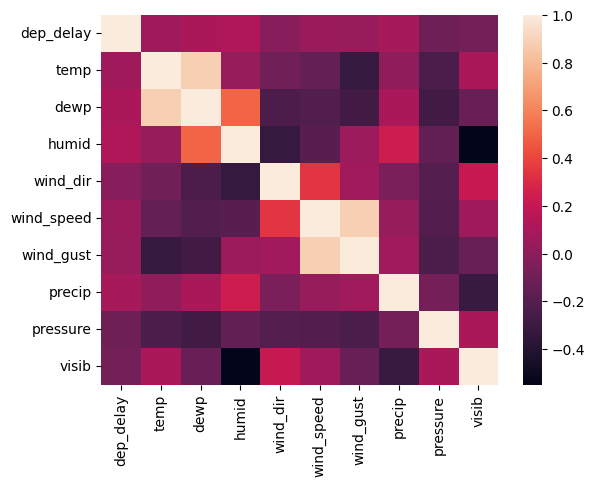

In [28]:
weather_variables = ['dep_delay', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']
sns.heatmap(flights_weather[weather_variables].corr())
plt.show()

Based on the heatmap above, there doesn't appear to be any correlations between the departure delay and the weather variables